# Bootstrapping

Bootstrapping is a resampling method used in statistics to estimate the distribution of a statistic or estimator by sampling with replacement from the original dataset. This technique allows for the approximation of the bias, variance, and confidence intervals for the statistic, making it a powerful tool for statistical inference, especially when the theoretical distribution of the statistic is unknown or when the sample size is small.

#### Mathematical Representation

The bootstrap estimate of a statistic (e.g., mean) is given by:

$$
\hat{\theta}^* = \frac{1}{B} \sum_{b=1}^{B} \theta_b^*
$$

where:
- $B$ is the number of bootstrap samples,
- $\theta^*_b$ is the estimate from the $b^{th}$ bootstrap sample.

#### Business Scenario: Online Estate Planning for Will and Trust Analysis

**Scenario Description**  
An online legal service company specializing in estate planning wishes to leverage its dataset of 10,000 client interactions to enhance user experience and service efficiency. The dataset encompasses variables such as Age, State, Income Level, Estate Value, Service Type, Completion Time, Documents Downloaded, Client Satisfaction, and Referral status.

**Business Problem**  
The objective is to dissect factors influencing client satisfaction and service completion time, aiming to boost service quality and operational efficiency.

**Applying Bootstrapping Statistical Methods**  
Bootstrapping enables the company to infer client satisfaction and service completion time characteristics without strict distribution assumptions.

**Steps for Bootstrapping Analysis**  
1. **Define Metrics of Interest:** Focus on client satisfaction and service completion time.
2. **Generate Bootstrap Samples:** Create 1,000 (or more) bootstrap samples from the original data, each with 10,000 randomly selected (with replacement) rows.
3. **Calculate Bootstrap Estimates:** Compute statistics (mean, median, etc.) for client satisfaction and service completion time for each sample.
4. **Analyze the Distribution of Bootstrap Estimates:** Assess the bootstrap estimates' mean, standard deviation, and 95% confidence intervals.
5. **Identify Patterns and Insights:** Explore how client satisfaction and completion time vary with different client demographics and service types.
6. **Make Data-Driven Decisions:** Utilize insights for service improvement, targeting specific client segments, or optimizing service processes.
7. **Validate Findings:** Confirm insights through other statistical methods or validation samples, if available.

#### Python Code to Simulate Data and to Perform Bootstrapping

In [36]:
import numpy as np
import pandas as pd

# Simulate the dataset again
np.random.seed(42)  # Ensure reproducibility


# Parameters for the simulation
n_clients = 10000
states = ['CA', 'TX', 'NY', 'FL', 'IL']
income_levels = ['Low', 'Medium', 'High']
service_types = ['Will', 'Trust', 'Both']
referral_status = ['Yes', 'No']

# Generate the dataset
df = pd.DataFrame({
    'user_id': range(1, n_clients + 1),
    'age': np.random.randint(25, 75, size=n_clients),
    'state': np.random.choice(states, size=n_clients),
    'income_level': np.random.choice(income_levels, size=n_clients, p=[0.3, 0.5, 0.2]),
    'estate_value': np.random.randint(50000, 500000, size=n_clients),
    'service_type': np.random.choice(service_types, size=n_clients, p=[0.4, 0.4, 0.2]),
    'completion_time': np.random.normal(loc=120, scale=30, size=n_clients),  # Assuming normal distribution
    'documents_downloaded': np.random.poisson(lam=5, size=n_clients),  # Assuming Poisson distribution
    'client_satisfaction': np.random.randint(1, 11, size=n_clients),  # 1-10 rating
    'referral': np.random.choice(referral_status, size=n_clients, p=[0.3, 0.7])
})

# Sample size and bootstrap parameters
n = df.shape[0]
n_bootstraps = 1000

def bootstrap_analysis(dataframe, column_name, n_bootstraps=1000):
    n = len(dataframe[column_name])  # Determine sample size from the data
    bootstrap_samples = np.random.choice(dataframe[column_name], (n_bootstraps, n))
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    mean = np.mean(bootstrap_means)
    ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])
    
    return mean, ci_lower, ci_upper

# Apply bootstrap analysis to 'client_satisfaction' and 'completion_time'
satisfaction_mean, satisfaction_ci_lower, satisfaction_ci_upper = bootstrap_analysis(df, 'client_satisfaction', n_bootstraps)
print(
    f"Client Time Mean: {satisfaction_mean:.4f}\n"
    f"Client Time Lower Confidence Interval of the Means: {satisfaction_ci_lower:.4f}\n"
    f"Client Time Upper Confidence Interval of the Means: {satisfaction_ci_upper:.4f}\n"
)

completion_time_mean, completion_time_ci_lower, completion_time_ci_upper = bootstrap_analysis(df, 'completion_time', n_bootstraps)
print(
    f"Client Time Mean: {completion_time_mean:.4f}\n"
    f"Client Time Lower Confidence Interval of the Means: {completion_time_ci_lower:.4f}\n"
    f"Client Time Upper Confidence Interval of the Means: {completion_time_ci_upper:.4f}\n"
)


Client Time Mean: 5.4519
Client Time Lower Confidence Interval of the Means: 5.3977
Client Time Upper Confidence Interval of the Means: 5.5072

Client Time Mean: 120.1139
Client Time Lower Confidence Interval of the Means: 119.5365
Client Time Upper Confidence Interval of the Means: 120.6783



#### Interpretation of Bootstrap Analysis Results

The bootstrap analysis for the online legal service company's dataset on client satisfaction and service completion time yielded the following insights:

**Client Satisfaction:**  
- **Mean:** 5.4519  
- **95% Confidence Interval (CI):** [5.3977, 5.5072]  
The average client satisfaction rating is approximately 5.4519 on a scale of 1 to 10, with a relatively narrow 95% confidence interval. This suggests a moderate level of satisfaction among clients, with the confidence interval indicating a consistent experience across the sample. There may be room for improvement to elevate satisfaction levels.

**Completion Time:**  
- **Mean:** 120.11 minutes  
- **95% Confidence Interval (CI):** [119.54, 120.68]  
The average service completion time is around 120.11 minutes, with the 95% confidence interval providing a precise estimate of the mean completion time. This indicates a relatively consistent service completion time across clients, suggesting efficient operational processes.

**Conclusion and Strategic Actions:**  
The bootstrap analysis provides robust estimates for client satisfaction and service completion time, enabling the company to make informed decisions to enhance their services. Given the moderate level of client satisfaction, the company might explore specific areas for service improvement, such as simplifying the service process, enhancing user interface design, or providing more personalized client support.

The consistency in service completion time suggests efficient service delivery, but there may still be opportunities to streamline the process further. For example, analyzing completion times alongside other variables like service type or income level might reveal specific areas where efficiency could be improved or where particular client segments may benefit from targeted enhancements.

By focusing on these metrics and considering broader patterns within the data, the company can target improvements in their online estate planning services, ultimately aiming to increase client satisfaction and operational efficiency. 

# BONUS: Bootstrapping Small Dataset

In this simple example, small dataset is generated representing satisfaction scores from 10 customers regarding a new product, with scores ranging from 1 to 10. The generated satisfaction scores are as follows: [7, 4, 8, 5, 7, 10, 3, 7, 8, 5].  

The original mean satisfaction score from this small dataset is 6.4.

Using bootstrapping with 1000 resamples to estimate the mean satisfaction score and its 95% confidence interval, we find that the confidence interval for the mean satisfaction score is approximately (5.1, 7.6). This means we are 95% confident that the true mean satisfaction score falls within this range.

In [44]:
import numpy as np
from scipy.stats import bootstrap

# Generate a small dataset: Let's say we're measuring the satisfaction scores out of 10 for a small sample of customers
# regarding a new product launch.
np.random.seed(42)
satisfaction_scores = np.random.randint(1, 11, size=10)  # Generate 10 random scores between 1 and 10

# Perform bootstrap to estimate the mean satisfaction score and its 95% confidence interval
res = bootstrap((satisfaction_scores,), np.mean, confidence_level=0.95, n_resamples=1000, method='percentile')

# Display the original data, the estimated mean, and the confidence interval
original_mean = np.mean(satisfaction_scores)
bootstrap_mean = res.confidence_interval.low, res.confidence_interval.high

original_mean, bootstrap_mean, satisfaction_scores

(6.4, (5.1, 7.6), array([ 7,  4,  8,  5,  7, 10,  3,  7,  8,  5]))

#### Interpretation of the Results

- **Original Mean:** The average satisfaction score calculated directly from the small sample is 6.4. This gives us a point estimate of the central tendency of customer satisfaction scores but does not provide information about the variability or uncertainty of this estimate.

- **Bootstrap Confidence Interval (5.1, 7.6):** This interval provides a range of plausible values for the true mean satisfaction score based on the small sample we have. The fact that the interval spans from 5.1 to 7.6 indicates that there is some uncertainty about the exact mean satisfaction score due to the small sample size. The bootstrap method helps quantify this uncertainty by resampling from the original data with replacement, allowing us to generate a distribution of mean scores from which the confidence interval is derived.

This simple example illustrates how bootstrapping can be particularly valuable when the dataset is small. It enables us to make inferences about the population mean and assess the uncertainty of these inferences, even when traditional parametric methods might be unreliable due to the small sample size.

#### Visualization

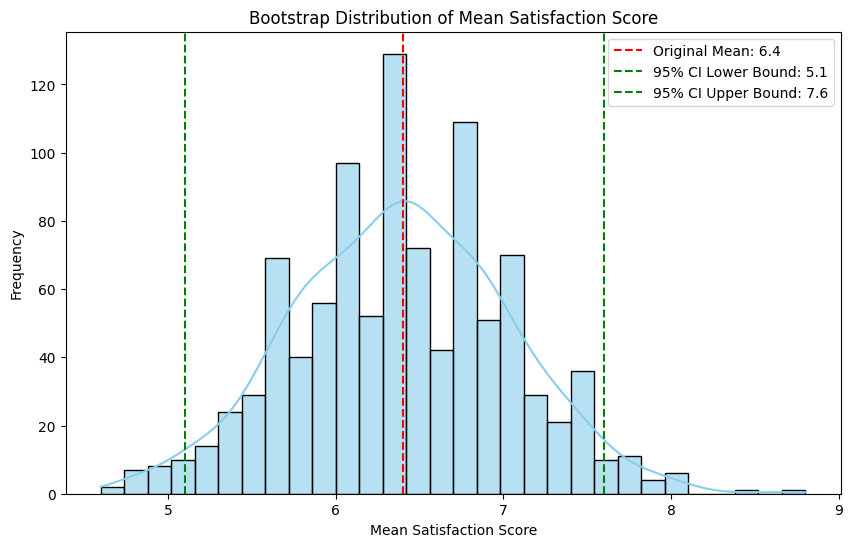

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Given satisfaction scores and previous setup
satisfaction_scores = np.array([7, 4, 8, 5, 7, 10, 3, 7, 8, 5])
n_bootstraps = 1000

# Generate bootstrap samples and calculating means
bootstrap_samples = np.random.choice(satisfaction_scores, (n_bootstraps, len(satisfaction_scores)), replace=True)
bootstrap_means = np.mean(bootstrap_samples, axis=1)

plt.figure(figsize=(10, 6))

# Histogram of bootstrap means
sns.histplot(bootstrap_means, bins=30, kde=True, color='skyblue', alpha=0.6, edgecolor='black')

# Original mean
plt.axvline(x=6.4, color='red', linestyle='--', label='Original Mean: 6.4')

# Confidence Interval
plt.axvline(x=5.1, color='green', linestyle='--', label='95% CI Lower Bound: 5.1')
plt.axvline(x=7.6, color='green', linestyle='--', label='95% CI Upper Bound: 7.6')

plt.title('Bootstrap Distribution of Mean Satisfaction Score')
plt.xlabel('Mean Satisfaction Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The visualization above displays the bootstrap distribution of the mean satisfaction score, derived from 1000 resamples of the original small dataset of customer satisfaction scores. The histogram shows the spread and density of the bootstrap mean satisfaction scores, with a kernel density estimate (KDE) overlay to highlight the distribution's shape.

- **Red dashed line:** Represents the original mean satisfaction score of 6.4, calculated directly from the small dataset. This line serves as a reference point to see where the original mean falls within the bootstrap distribution.

- **Green dashed lines:** Mark the 95% confidence interval (CI) bounds, estimated from the bootstrap distribution. The lower bound is at 5.1, and the upper bound is at 7.6. This interval suggests that we can be 95% confident that the true mean satisfaction score falls within this range, based on the bootstrap analysis.

This insightful, cool, and professional visualization demonstrates the power of bootstrapping, especially when working with small datasets. It provides a way to estimate the uncertainty of the mean satisfaction score and visually communicates the range within which the true mean is likely to lie, offering valuable insights for decision-making.